In [5]:
import os, sys
import glob
sys.path.append('/Users/bryanbrzycki/Documents/Personal/Evolution-Code/Code/blossom')
sys.path.append('../')

import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

from blossom import *
from flowerpot import *

In [6]:
organism_list = dataset_io.load_organism_dataset('/Users/bryanbrzycki/Documents/Personal/Evolution-Code/Code/blossom/scripts/datasets/test_drinking/organisms_ds0010.txt')
organism_list

In [7]:
# time = 100

# org_fields = ['alive', 'old_age', 'thirst']
# world_fields = ['water']
# organism_paths = sorted(glob.glob('/Users/bryanbrzycki/Documents/Personal/Evolution-Code/Code/blossom/scripts/datasets/test_general/organisms_ds????.txt'))
# world_paths = sorted(glob.glob('/Users/bryanbrzycki/Documents/Personal/Evolution-Code/Code/blossom/scripts/datasets/test_general/world_ds????.txt'))

# # for field in org_fields:
# #     plot_organism_field(time, organism_paths, world_paths, field)
# # for field in world_fields:
# #     plot_world_field(time, world_paths, field)
    
# fig, axes = plt.subplots(3, 3, sharey='row', figsize=(10,20))
# # (ax1, ax2, ax3, ax4, ax5) = axes
# plt.sca(axes[0][0])
# plot_organism_field(time, organism_paths, world_paths, 'alive')
# plt.sca(axes[1][0])
# plot_world_field(time, world_paths, 'water')
# plt.sca(axes[1][1])
# plot_world_field(time, world_paths, 'food')
# plt.sca(axes[2][0])
# plot_organism_field(time, organism_paths, world_paths, 'thirst')
# plt.sca(axes[2][1])
# plot_organism_field(time, organism_paths, world_paths, 'hunger')
# plt.sca(axes[2][2])
# plot_organism_field(time, organism_paths, world_paths, 'old_age')
# plt.sca(axes[0][1])
# plot_organism_field(time, organism_paths, world_paths, 'newborn')

# fig.add_subplot(111, frameon=False)
# plt.tick_params(labelcolor='none', top=False, bottom=False, left=False, right=False)
# plt.grid(False)

# plt.xlabel('Position')
# plt.ylabel('Time')
# for ax in axes:
#     plt.sca(ax)
#     plt.tick_params(labelcolor='black', top=False, bottom=True, left=True, right=False)

# # fig.subplots_adjust(wspace = 0.5)
# plt.tight_layout()
    
# plt.show()

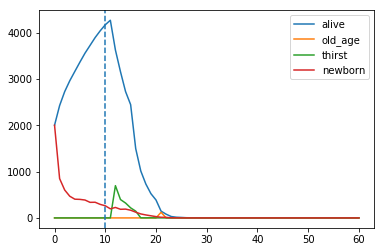

In [8]:
time = 60

organism_paths = sorted(glob.glob('/Users/bryanbrzycki/Documents/Personal/Evolution-Code/Code/blossom/scripts/datasets/test_general/organisms_ds????.txt'))
world_paths = sorted(glob.glob('/Users/bryanbrzycki/Documents/Personal/Evolution-Code/Code/blossom/scripts/datasets/test_general/world_ds????.txt'))


fields = ['alive', 'old_age', 'thirst', 'newborn']

# fig = plt.figure(figsize=(20,8))
for field in fields:
    values = []
    for i in range(time + 1):
        with open(organism_paths[i], 'r') as f:
            organism_list = json.load(f)
        with open(world_paths[i], 'r') as f:
            world = json.load(f)

        matching_organisms = []
        for organism_dict in organism_list:
            if field == 'alive' and organism_dict['alive'] \
            or field == 'old_age' and organism_dict['cause_of_death'] == 'old_age' \
            or field == 'thirst' and organism_dict['cause_of_death'] == 'thirst' \
            or field == 'hunger' and organism_dict['cause_of_death'] == 'hunger' \
            or field == 'newborn' and organism_dict['age'] == 0:
                matching_organisms.append(organism_dict['position'])
        values.append(len(matching_organisms))

    plt.plot(values, label=field)
plt.axvline(x=10, linestyle='--')
# plt.yscale('symlog')
plt.legend()
plt.show()

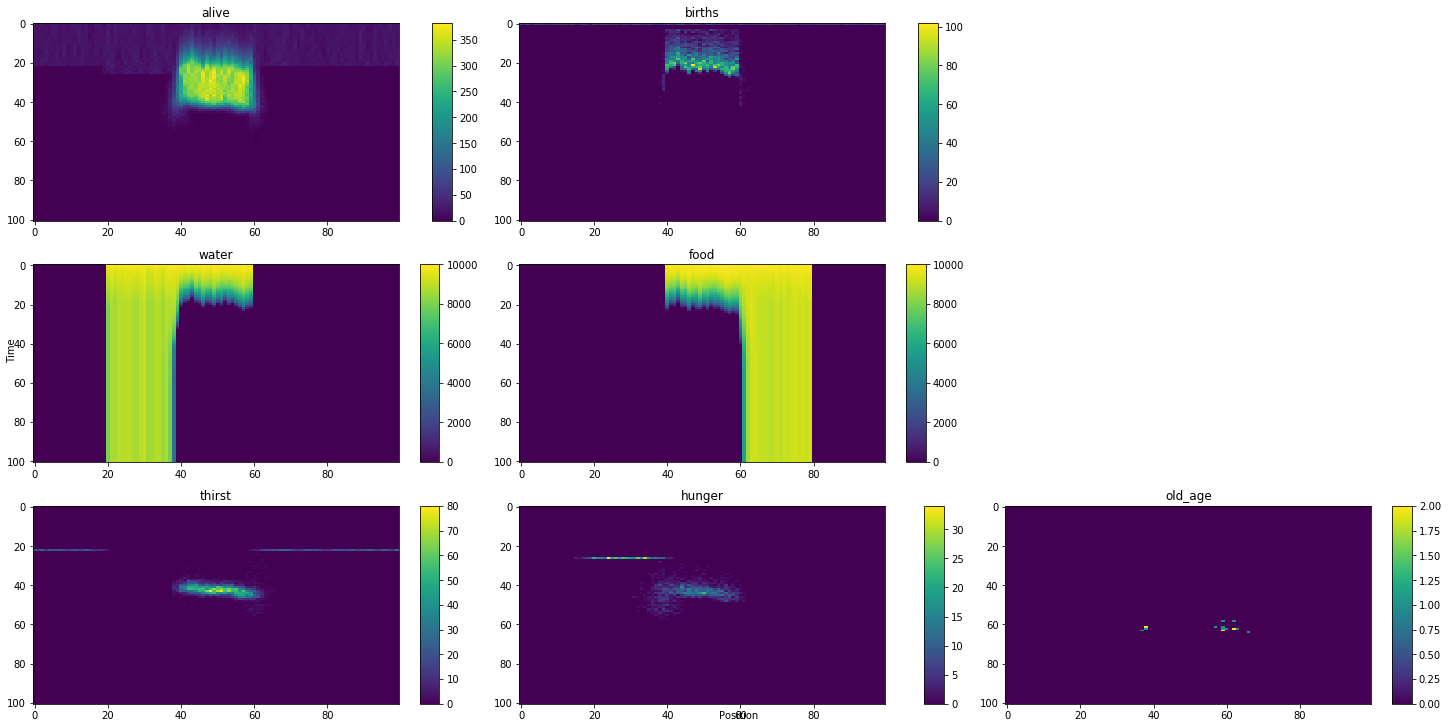

In [42]:
# Try GridSpec
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

time = 100

org_fields = ['alive', 'old_age', 'thirst']
world_fields = ['water']
organism_paths = sorted(glob.glob('/Users/bryanbrzycki/Documents/Personal/Evolution-Code/Code/blossom/scripts/datasets/test_general/organisms_ds????.txt'))
world_paths = sorted(glob.glob('/Users/bryanbrzycki/Documents/Personal/Evolution-Code/Code/blossom/scripts/datasets/test_general/world_ds????.txt'))

# for field in org_fields:
#     plot_organism_field(time, organism_paths, world_paths, field)
# for field in world_fields:
#     plot_world_field(time, world_paths, field)
    
fig = plt.figure(constrained_layout=True, figsize=(20,10))
gs = gridspec.GridSpec(ncols=3, nrows=3, figure=fig)

ax00 = fig.add_subplot(gs[0, 0])
plt.sca(ax00)
plot_organism_field(time, organism_paths, world_paths, 'alive')

ax10 = fig.add_subplot(gs[1, 0])
plt.sca(ax10)
plot_world_field(time, world_paths, 'water')

ax11 = fig.add_subplot(gs[1, 1])
plt.sca(ax11)
plot_world_field(time, world_paths, 'food')

ax20 = fig.add_subplot(gs[2, 0])
plt.sca(ax20)
plot_organism_field(time, organism_paths, world_paths, 'thirst')

ax21 = fig.add_subplot(gs[2, 1])
plt.sca(ax21)
plot_organism_field(time, organism_paths, world_paths, 'hunger')

ax22 = fig.add_subplot(gs[2, 2])
plt.sca(ax22)
plot_organism_field(time, organism_paths, world_paths, 'old_age')

ax01 = fig.add_subplot(gs[0, 1])
plt.sca(ax01)
plot_organism_field(time, organism_paths, world_paths, 'births')

axes = [ax00, ax10, ax11, ax20, ax21, ax22, ax01]

fig.add_subplot(111, frameon=False)
plt.tick_params(labelcolor='none', top=False, bottom=False, left=False, right=False)
plt.grid(False)

plt.xlabel('Position')
plt.ylabel('Time')
for ax in axes:
    plt.sca(ax)
    plt.tick_params(labelcolor='black', top=False, bottom=True, left=True, right=False)

# fig.subplots_adjust(wspace = 0.5)
# plt.tight_layout()
    
plt.show()

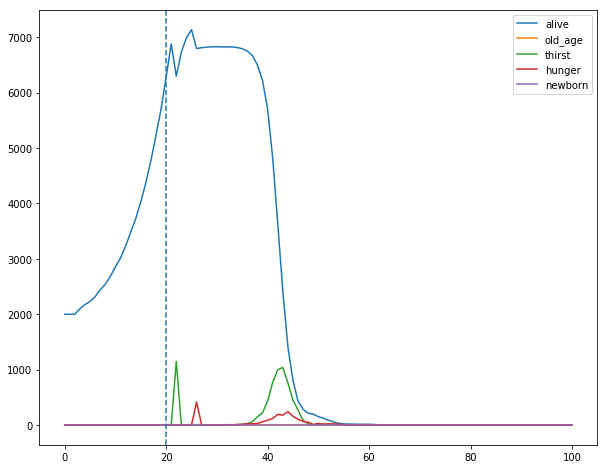

In [43]:
time = 100

fields = ['alive', 'old_age', 'thirst', 'hunger', 'newborn']
# fields = ['old_age', 'thirst', 'hunger', 'births']


fig = plt.figure(figsize=(10,8))
for field in fields:
    values = []
    for i in range(time + 1):
        with open(organism_paths[i], 'r') as f:
            organism_list = json.load(f)
        with open(world_paths[i], 'r') as f:
            world = json.load(f)

        matching_organisms = []
        for organism_dict in organism_list:
            if field == 'alive' and organism_dict['alive'] \
            or field == 'old_age' and organism_dict['cause_of_death'] == 'old_age' \
            or field == 'thirst' and organism_dict['cause_of_death'] == 'thirst' \
            or field == 'hunger' and organism_dict['cause_of_death'] == 'hunger' \
            or field == 'births' and organism_dict['age'] == 0:
                matching_organisms.append(organism_dict['position'])
        values.append(len(matching_organisms))
    if field == 'births':
        values = [val // 2 for val in values]

    plt.plot(values, label=field)
plt.axvline(x=20, linestyle='--')
# plt.yscale('symlog')
plt.legend()
plt.show()